# Eager Execution

Adapted from: https://www.tensorflow.org/get_started/eager

In [1]:
import os
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.contrib.eager as tfe
tf.enable_eager_execution()

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
train_dataset_fp = '../data/iris_training.csv'

In [4]:
!head -n5 {train_dataset_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


## Csv parser

In [5]:
# pandas fine for small datasets, but not big datasets
# So, use a tool like Spark, or do directly via this tf dataset API
def parse_csv(line):
    example_defaults = [[0.], [0.], [0.], [0.], [0]]
    parsed_line = tf.decode_csv(line, example_defaults)
    features = tf.reshape(parsed_line[:-1], shape=(4,))
    label = tf.reshape(parsed_line[-1], shape=())
    return features, label

## Dataset API

In [6]:
# apply some transformations to dataset
# similar to spark rdd
train_dataset = tf.data.TextLineDataset(train_dataset_fp)
train_dataset = train_dataset.skip(1)
train_dataset = train_dataset.map(parse_csv)
train_dataset = train_dataset.shuffle(buffer_size=1000)
train_dataset = train_dataset.batch(32)

In [7]:
train_dataset

<BatchDataset shapes: ((?, 4), (?,)), types: (tf.float32, tf.int32)>

In [8]:
features, label = tfe.Iterator(train_dataset).next()

In [9]:
features

<tf.Tensor: id=41, shape=(32, 4), dtype=float32, numpy=
array([[5. , 2.3, 3.3, 1. ],
       [6.5, 3. , 5.5, 1.8],
       [7.3, 2.9, 6.3, 1.8],
       [4.7, 3.2, 1.6, 0.2],
       [7.7, 3. , 6.1, 2.3],
       [5.1, 3.5, 1.4, 0.3],
       [6.9, 3.1, 5.1, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [6.5, 2.8, 4.6, 1.5],
       [4.6, 3.6, 1. , 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [5.1, 3.8, 1.9, 0.4],
       [5.8, 2.7, 4.1, 1. ],
       [5.1, 2.5, 3. , 1.1],
       [6.8, 3. , 5.5, 2.1],
       [5. , 2. , 3.5, 1. ],
       [7.4, 2.8, 6.1, 1.9],
       [5.7, 2.8, 4.1, 1.3],
       [6.2, 2.8, 4.8, 1.8],
       [5.4, 3.4, 1.5, 0.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [7.2, 3.6, 6.1, 2.5],
       [4.8, 3. , 1.4, 0.1],
       [7.6, 3. , 6.6, 2.1],
       [6.1, 2.8, 4.7, 1.2],
       [6. , 3. , 4.8, 1.8],
       [5.7, 3. , 4.2, 1.2],
       [4.8, 3. , 1.4, 0.3],
       [6. , 2.9, 4.5, 1.5],
       [6.6, 2.9, 4.6, 1.3],
       [6.7, 3.3, 5.7, 2.1]], dtype=float32)>

In [10]:
label

<tf.Tensor: id=42, shape=(32,), dtype=int32, numpy=
array([1, 2, 2, 0, 2, 0, 2, 1, 1, 0, 0, 0, 1, 1, 2, 1, 2, 1, 2, 0, 1, 1,
       2, 0, 2, 1, 2, 1, 0, 1, 1, 2], dtype=int32)>

## Model

Note that the model is outputting the logits, not the softmax probabilities.

In [11]:
# No compile because all it does is create a tensorflow graph, don't need in eager mode
# No model.fit, model(features)
# No output classification softmax, which we'd expect since we're classifying 
# But, model(feautures) still outputing 3 numbers we need to pick one value to classify (see Loss section)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation="relu", input_shape=(4,)),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(3)
])

In [12]:
model

model behaves like a function:

In [13]:
model(features)

<tf.Tensor: id=128, shape=(32, 3), dtype=float32, numpy=
array([[-6.0962253 ,  0.89741874, -1.2412481 ],
       [-8.036495  ,  1.3397778 , -1.468551  ],
       [-8.655273  ,  1.4394779 , -1.7768468 ],
       [-6.4089518 ,  0.82139236, -1.1069876 ],
       [-9.098348  ,  1.4673537 , -1.916502  ],
       [-6.9801283 ,  0.8774224 , -1.2324752 ],
       [-8.502437  ,  1.3892742 , -1.6590663 ],
       [-7.0897593 ,  1.0530822 , -1.639731  ],
       [-7.8112297 ,  1.1820266 , -1.619966  ],
       [-6.623498  ,  0.8771488 , -1.072196  ],
       [-7.562397  ,  0.9972783 , -1.2348311 ],
       [-7.245529  ,  0.9939742 , -1.105639  ],
       [-7.0803847 ,  1.0511938 , -1.4029241 ],
       [-6.3430457 ,  0.92346567, -1.2717996 ],
       [-8.322884  ,  1.3792034 , -1.5950783 ],
       [-5.8629484 ,  0.85582817, -1.287231  ],
       [-8.652611  ,  1.3956472 , -1.8510089 ],
       [-7.122948  ,  1.108681  , -1.3341181 ],
       [-7.6177382 ,  1.2366433 , -1.4650671 ],
       [-7.16029   ,  0.8805303

In eager mode we can access the values of the weights directly:

In [14]:
for i, v in enumerate(model.variables):
    print("Weight shape: ", v.shape)
    print("Weight tensor: ", v)
    print()


Weight shape:  (4, 10)
Weight tensor:  <tf.Variable 'dense/kernel:0' shape=(4, 10) dtype=float32, numpy=
array([[ 0.51832306,  0.23540789, -0.1653719 ,  0.57931423, -0.5936954 ,
         0.32445633,  0.5442407 , -0.50623035, -0.52088237,  0.62775946],
       [ 0.6132349 , -0.25912276,  0.5377127 ,  0.42374802,  0.48477614,
        -0.08954698,  0.33349657, -0.04464889, -0.0953148 , -0.38139927],
       [-0.32950556, -0.35746995,  0.49356198, -0.25178507, -0.06889457,
         0.31853676,  0.6212263 ,  0.38923705,  0.1455915 , -0.56983095],
       [ 0.44904566, -0.21505016, -0.0997889 , -0.58980393, -0.54495734,
        -0.04370207,  0.06355566,  0.010939  ,  0.20607501,  0.32304007]],
      dtype=float32)>

Weight shape:  (10,)
Weight tensor:  <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

Weight shape:  (10, 10)
Weight tensor:  <tf.Variable 'dense_1/kernel:0' shape=(10, 10) dtype=float32, numpy=
array([[-0.

## Loss

Loss is sparse categorical cross entropy

In [15]:
def loss(model, x, y):
    y_ = model(x) # predictions
    return tf.losses.sparse_softmax_cross_entropy(labels=y, logits=y_)

In [16]:
loss(model, features, label)

<tf.Tensor: id=193, shape=(), dtype=float32, numpy=3.0506945>

## Gradients

In eager mode we can evaluate the gradients, which is helpful for debugging

In [17]:
def grad(model, inputs, targets):
    with tfe.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return tape.gradient(loss_value, model.variables)

In [18]:
grads = grad(model, features, label)

In [19]:
for i, g in enumerate(grads):
    print("Gradient shape: ", g.shape)
    print("Gradient tensor: ", g)
    print()


Gradient shape:  (4, 10)
Gradient tensor:  tf.Tensor(
[[ 0.66411257  0.          0.28524128  0.015228    0.         -0.8462511
   1.9846631   0.          0.          0.93759036]
 [ 0.54853165  0.          0.1703124   0.09995704  0.         -0.5209032
   1.1002431   0.          0.          0.39036477]
 [ 0.03102453  0.          0.12880442 -0.15084471  0.         -0.35536817
   1.1188843   0.          0.          0.8007458 ]
 [-0.02723662  0.          0.03253525 -0.05761655  0.         -0.08646532
   0.3439806   0.          0.          0.2858469 ]], shape=(4, 10), dtype=float32)

Gradient shape:  (10,)
Gradient tensor:  tf.Tensor(
[ 0.15404978  0.          0.0514803   0.0230708   0.         -0.15620232
  0.33685777  0.          0.          0.12867033], shape=(10,), dtype=float32)

Gradient shape:  (10, 10)
Gradient tensor:  tf.Tensor(
[[ 0.4261525  -1.0990418   1.1501377   1.6872939   0.          0.9705759
   1.767706    0.         -0.08290696  0.23233041]
 [ 0.          0.          0.  

## Optimizer

Let's use simple gradient descent

In [20]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

## Training Loop
Gradient descent by hand

In [27]:
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

# Loop over epochs
for epoch in range(num_epochs):
    
    # accumulators for mean loss and accuracy
    epoch_loss_avg = tfe.metrics.Mean()
    epoch_accuracy = tfe.metrics.Accuracy()

    # loop on dataset, for each batch:
    for x, y in tfe.Iterator(train_dataset):
        # Calculate gradients
        grads = grad(model, x, y)
        
        # Apply gradients to the weights
        # w -> w - g
        optimizer.apply_gradients(zip(grads, model.variables),
                                  global_step=tf.train.get_or_create_global_step())

        # accumulate loss
        epoch_loss_avg(loss(model, x, y))
        
        # calculate predictions
        y_pred = tf.argmax(model(x), axis=1, output_type=tf.int32)
        # acccumulate accuracy
        epoch_accuracy(y_pred, y)

    # end epoch
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())

    if epoch % 50 == 0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                    epoch_loss_avg.result(),
                                                                    epoch_accuracy.result()))

Epoch 000: Loss: 0.128, Accuracy: 96.667%
Epoch 050: Loss: 0.094, Accuracy: 97.500%
Epoch 100: Loss: 0.094, Accuracy: 97.500%
Epoch 150: Loss: 0.093, Accuracy: 97.500%
Epoch 200: Loss: 0.080, Accuracy: 96.667%


## Plot Metrics

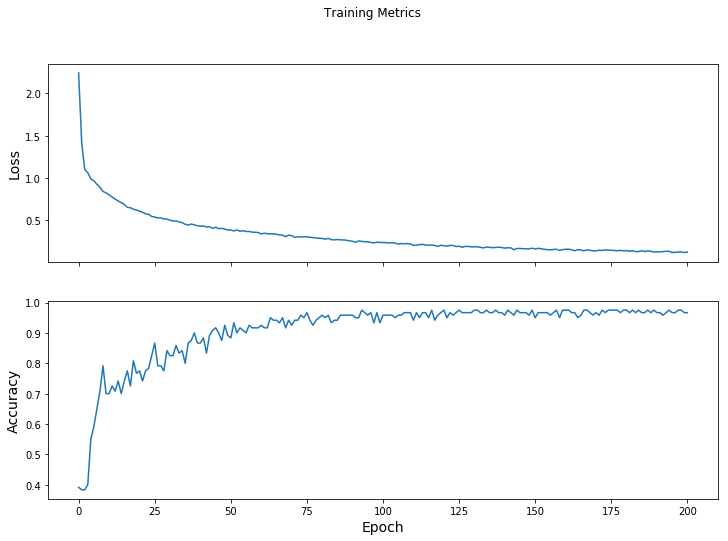

In [22]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)

plt.show()

## Test

In [23]:
test_fp = '../data/iris_test.csv'

In [24]:
test_dataset = tf.data.TextLineDataset(test_fp)
test_dataset = test_dataset.skip(1)             # skip header row
test_dataset = test_dataset.map(parse_csv)      # parse each row with the funcition created earlier
test_dataset = test_dataset.shuffle(1000)       # randomize
test_dataset = test_dataset.batch(32)           # use the same batch size as the training set

In [25]:
test_accuracy = tfe.metrics.Accuracy()

for (x, y) in tfe.Iterator(test_dataset):
    prediction = tf.argmax(model(x), axis=1, output_type=tf.int32)
    test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 93.333%


In [26]:
class_ids = ["Iris setosa", "Iris versicolor", "Iris virginica"]

predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
    class_idx = tf.argmax(logits).numpy()
    name = class_ids[class_idx]
    print("Example {} prediction: {}".format(i, name))

Example 0 prediction: Iris setosa
Example 1 prediction: Iris versicolor
Example 2 prediction: Iris virginica
